# Exercise Solution: Exploring Data With Jupyter, Pandas, and Matplotlib


## Fact Finding:

Find the answer to each of these questions:

* What was the most expensive property sold in the dataset?
* How many sales were for less than $10
    * How could this possibly be right? (Hint: read the data documentation on Kaggle...)
* How many of the properties sold were built prior to 1950?
* What is the smallest gross square feet property sold?
    * What was the largest?
* Which zip code had the fewest number of sales?


In [1]:
# Before we can start, we should import the libraries we're going to use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Then load the data
path_to_ny_sales = '../../datasets/nyc-property/nyc-rolling-sales.csv'
sales_df = pd.read_csv(path_to_ny_sales)
sales_df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# To make things cleaner, I'm also going to drop rows that have a missing:
# price, gross square feet, land square feet, or year built.

# This code is in the example notebook
columns_to_convert = [
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET',
    'SALE PRICE',
    'YEAR BUILT'
]

for column_name in columns_to_convert:
    sales_df[column_name] = pd.to_numeric(sales_df[column_name], errors='coerce')
    sales_df = sales_df[sales_df[column_name].notna()]
    
sales_df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,48244.000000,4.824400e+04
mean,10448.940511,3.251741,4984.532191,234.324662,10939.681328,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.475769,1.153281e+06
std,7574.416359,0.903136,3427.418090,496.361521,1072.752086,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,0.833589,1.340131e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,3919.750000,3.000000,2206.750000,21.000000,10469.000000,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,1.000000,8.042000e+04
50%,8084.000000,3.000000,4660.500000,45.000000,11217.000000,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,1.000000,4.800000e+05
75%,17160.000000,4.000000,6996.000000,94.000000,11237.000000,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,2.000000,8.300000e+05
max,26702.000000,5.000000,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [4]:
# What was the most expensive property sold?
  # Actually, we can see this in the information above from the .describe() function!
  # Max sale price was 2.210000e+09 aka 2.21 BILLION DOLLARS!! 
# But you can also find it this way:
sales_df['SALE PRICE'].max()

# Relevant documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html

2210000000.0

In [5]:
# How many properties sold were built prior to 1950?
# The easiest way to do this is filter the dataframe, then count the rows.
before_1950 = sales_df[sales_df['YEAR BUILT'] < 1950]
print(len(before_1950))

# Note, you could also use the "count" function, though it gives more information than we need.
  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html
before_1950.count()

30232


Unnamed: 0                        30232
BOROUGH                           30232
NEIGHBORHOOD                      30232
BUILDING CLASS CATEGORY           30232
TAX CLASS AT PRESENT              30232
BLOCK                             30232
LOT                               30232
EASE-MENT                         30232
BUILDING CLASS AT PRESENT         30232
ADDRESS                           30232
APARTMENT NUMBER                  30232
ZIP CODE                          30232
RESIDENTIAL UNITS                 30232
COMMERCIAL UNITS                  30232
TOTAL UNITS                       30232
LAND SQUARE FEET                  30232
GROSS SQUARE FEET                 30232
YEAR BUILT                        30232
TAX CLASS AT TIME OF SALE         30232
BUILDING CLASS AT TIME OF SALE    30232
SALE PRICE                        30232
SALE DATE                         30232
dtype: int64

In [6]:
# Smallest and largest gross square feet
  # Once again, this information was in the "describe()" output
    # Smallest: 0 square feet (weird right?)
    # Largest: 3.750565e+06 aka 3,750,565 square feet (HOLY S***)

# Again, you could also find these values using .min() and .max() on the proper columns:
print(sales_df['GROSS SQUARE FEET'].min())
print(sales_df['GROSS SQUARE FEET'].max())

# But, inquiring minds want to know Lets find out what the smallest non-zero property is
# I imagine any 0 values are more likely "missing" than being a property that actually 
# doesn't have a size...
non_zero_gross_sq_feet = sales_df[sales_df['GROSS SQUARE FEET'] != 0]
non_zero_gross_sq_feet['GROSS SQUARE FEET'].min() # 60. Wow, that's a small property. 

0.0
3750565.0


60.0

In [7]:
# Which zip code had the fewest number of sales?
# The easiest way to do this is to use the .value_counts() function on the ZIP CODE column.
# This will tell us how many times each zip code appears in the overall data.
  # Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

print(sales_df['ZIP CODE'].value_counts())
# The data is returned in sorted order based on the count.
# So, zip code 11201 has the most sales: 1324
# and 10803 only has 1 sale. 
# We also learned that there are 180 zip codes represented in this dataset.

11201    1324
11235    1312
11234    1165
11229     916
11215     899
         ... 
10167       1
11005       1
10006       1
10044       1
10803       1
Name: ZIP CODE, Length: 180, dtype: int64


## Chart Making:

Create the following charts:

* A barchart showing how many properties were sold in each borough.
    * Use the data documentation to find the names of each borough rather than the 1-5 values.
* A pie chart showing the share of sales by borough.
    * Use the data documentation to find the names of each borough rather than the 1-5 values.
* A barchart showing the average (mean) sale price of property in each zip code.
* A scatterplot showing the sales price by the gross square feet.
    * **Bonus points**: show the least squares regression line as well!

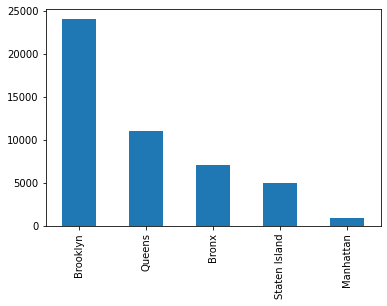

In [8]:
# A boxplot showing how many properties were sold in each borough.
# We can use value_counts for this too:
sales_by_borough = sales_df['BOROUGH'].value_counts()

# Replace the numbered boroughs with their names:
  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
sales_by_borough.rename(index={
        1: 'Manhattan',
        2: 'Bronx',
        3: 'Brooklyn',
        4: 'Queens',
        5: 'Staten Island'
    }, 
    inplace=True
)

# Make the plot using pandas!
  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
sales_by_borough.plot.bar()

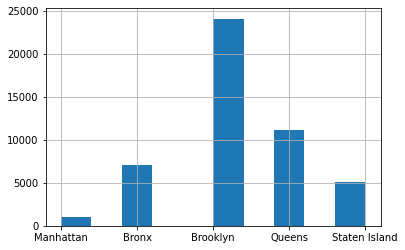

In [9]:
# Alternative solution:
sales_df['BOROUGH'].map({
    1 : 'Manhattan',
    2 : 'Bronx',
    3 : 'Brooklyn',
    4 : 'Queens',
    5 : 'Staten Island',
}).hist()

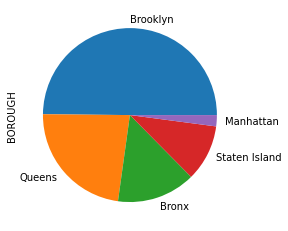

In [10]:
# We already have the data, so a pie chart is very easy to make (as long as you know what function to use):
  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html
sales_by_borough.plot.pie()

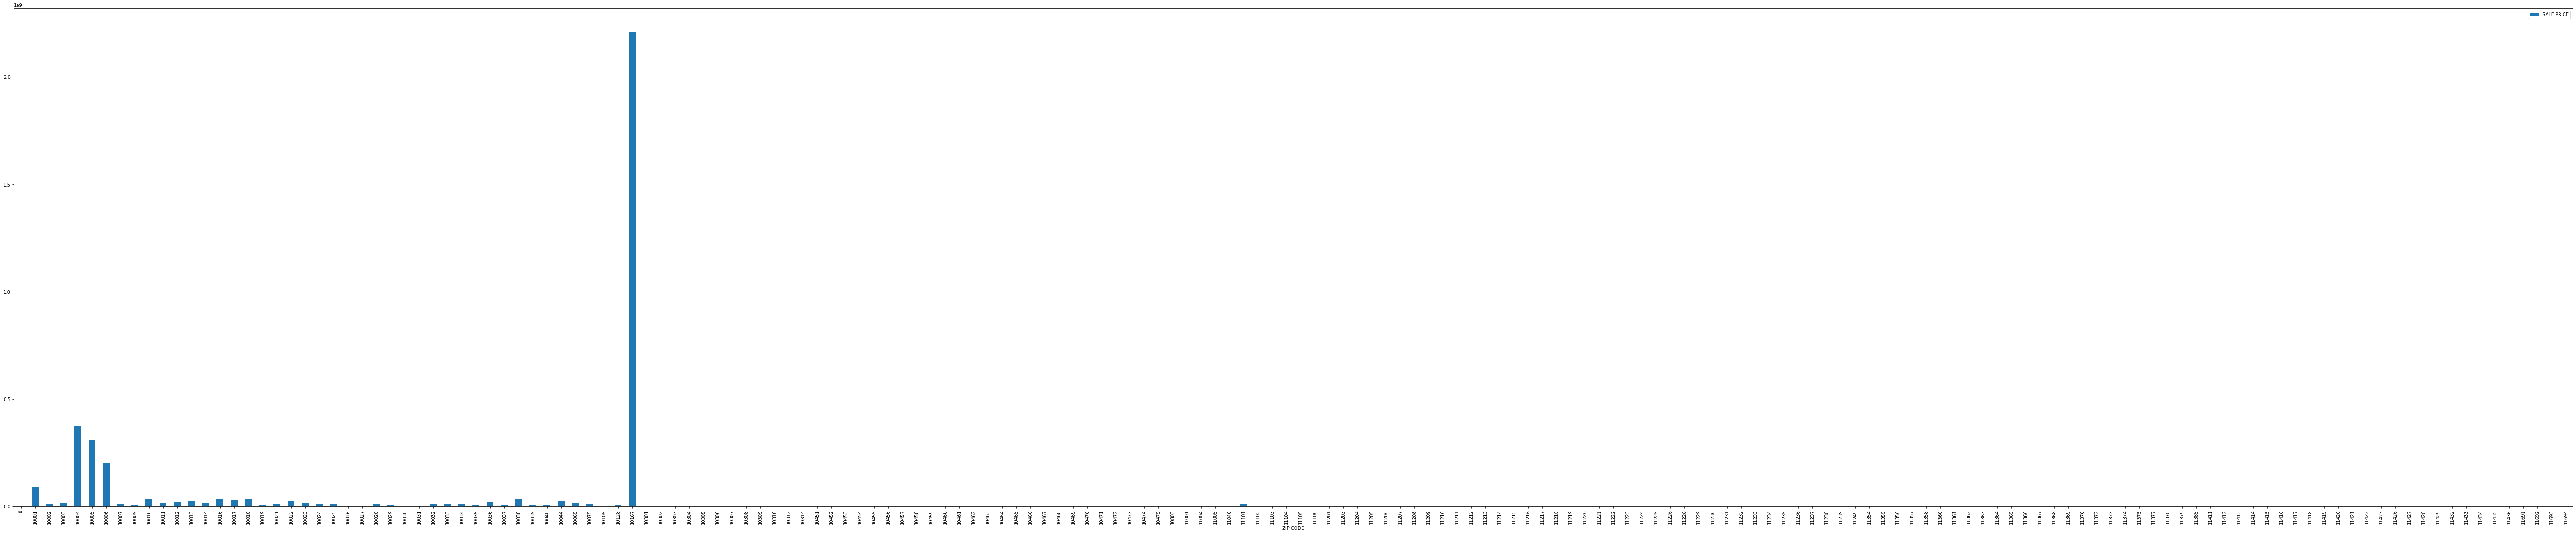

In [11]:
# A barchart showing the average (mean) sale price of property in each zip code.
# This one is a bit trickier... we need to group the data based on the zip code:
  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
sales_and_zip = sales_df[['ZIP CODE', 'SALE PRICE']]

sales_grouped_by_zip = sales_and_zip.groupby(['ZIP CODE']).mean()
sales_grouped_by_zip.plot.bar(figsize=(100, 20))

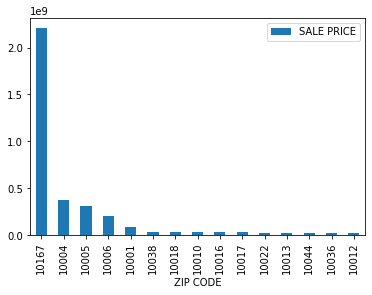

In [12]:
# Hmmmm... that's not very interesting or usable. 
# 180 values is just too many, and the range of sale prices is also too broad.
sales_and_zip = sales_df[['ZIP CODE', 'SALE PRICE']]

sales_grouped_by_zip = sales_and_zip.groupby(['ZIP CODE']).mean()

# Now, lets sort it by average sale price and just display the top 15
sorted_sales_by_zip = sales_grouped_by_zip.sort_values(by=['SALE PRICE'], ascending=False)
top_15 = sorted_sales_by_zip[0:15]
top_15.plot.bar()

# Fun fact, the 10167 zip code is ONE CITY BLOCK on Park Ave.
  # (https://www.zip-codes.com/zip-code/10167/zip-code-10167.asp)
  # https://en.wikipedia.org/wiki/245_Park_Avenue  

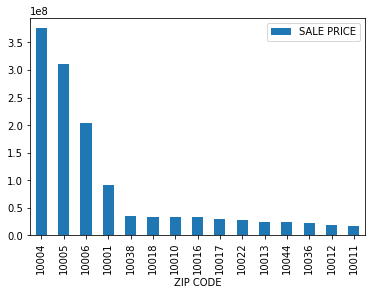

In [13]:
# Okay, one more, lets leave out the 245 Park Street sale 
# and look at the next top 15 zips to get a better picture overall:
sorted_sales_by_zip[1:16].plot.bar()

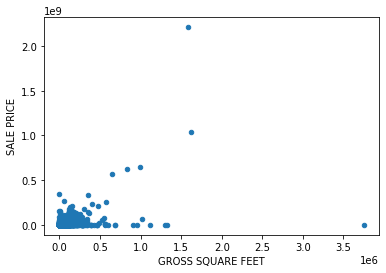

In [14]:
# Finally, A scatterplot showing the sales price by the gross square feet. 
sales_df.plot.scatter(x='GROSS SQUARE FEET', y='SALE PRICE')

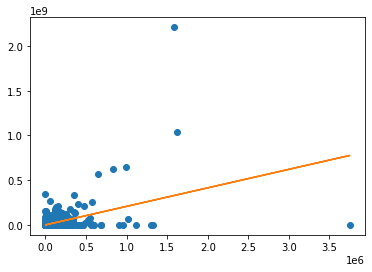

In [15]:
# To get the regression line we need to do a bit more work and use some lower level libraries directly
  # pyplot plot function: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html
  # numpy polyfit: https://numpy.org/doc/1.18/reference/generated/numpy.polyfit.html
x = sales_df['GROSS SQUARE FEET']
y = sales_df['SALE PRICE']

slope, y_intercept = np.polyfit(x, y, 1) # one is for "first degree polynomial" aka, a line.

# Plot the scatter, then the line, then show the plot:
plt.plot(x, y, 'o') # 'o' is for "dots"
plt.plot(x, y_intercept + slope * x, '-') # '-' is for "line"

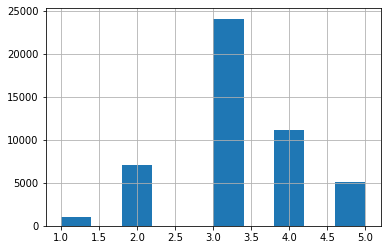

In [16]:
sales_df['BOROUGH'].hist()